**Instagram Reach Analysis using Python**

**Introduction**

nstagram is one of the most widely used social media platforms, where millions of posts are shared every day. Content creators monitor their engagement metrics to understand what type of content resonates most with their audience. Among these metrics, reach (impressions) is a crucial indicator, as it reflects how many people a post has reached.

The goal of this case study is to:

Analyze the factors affecting the reach of Instagram posts.

Build a predictive model to estimate the reach of future posts.

Derive actionable insights to optimize posting strategies.

The dataset includes the following features:

- Impressions (Reach)

- From Home, From Hashtags, From Explore, From Other

- Saves, Comments, Shares, Likes

- Profile Visits, Follows

- Caption, Hashtags

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

from wordcloud import WordCloud, STOPWORDS


**Data Import**

In [ ]:
df = pd.read_csv("Instagram data.csv", encoding="latin1")

In [ ]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [ ]:
df.describe()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [ ]:
df.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [ ]:
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


In [ ]:
df.shape

(119, 13)

**Data Visualization**

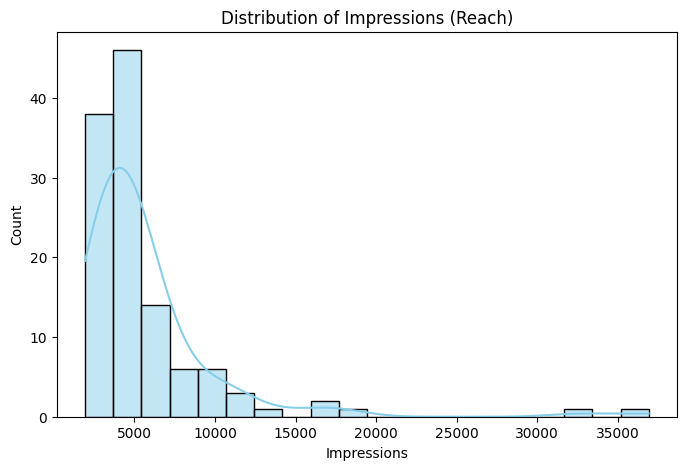

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Impressions"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Impressions (Reach)")
plt.xlabel("Impressions")
plt.ylabel("Count")
plt.show()

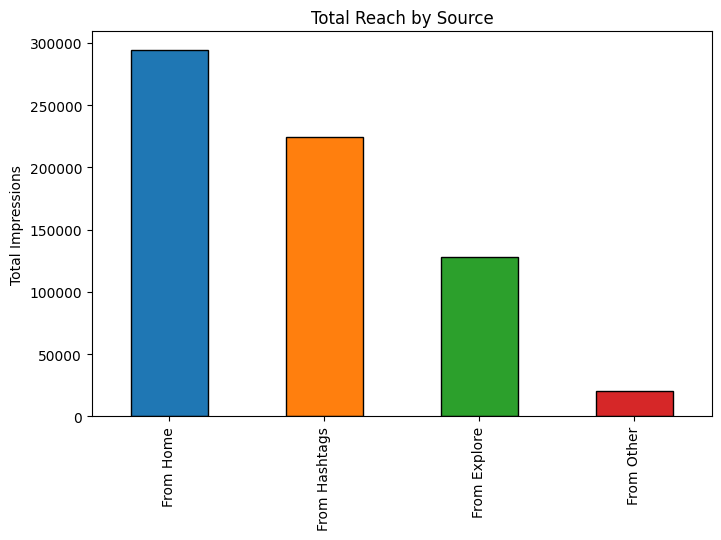

In [ ]:
sources = ["From Home", "From Hashtags", "From Explore", "From Other"]

plt.figure(figsize=(8,5))
df[sources].sum().plot(kind="bar", color=["#1f77b4","#ff7f0e","#2ca02c","#d62728"], edgecolor="black")
plt.title("Total Reach by Source")
plt.ylabel("Total Impressions")
plt.show()

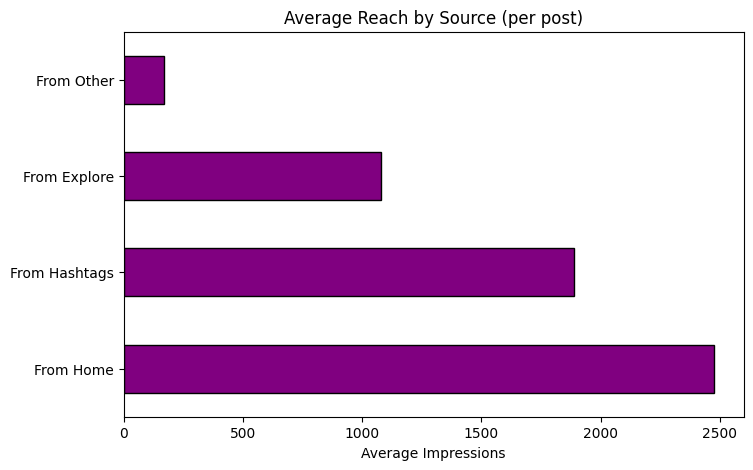

In [ ]:
plt.figure(figsize=(8,5))
df[sources].mean().plot(kind="barh", color="purple", edgecolor="black")
plt.title("Average Reach by Source (per post)")
plt.xlabel("Average Impressions")
plt.show()

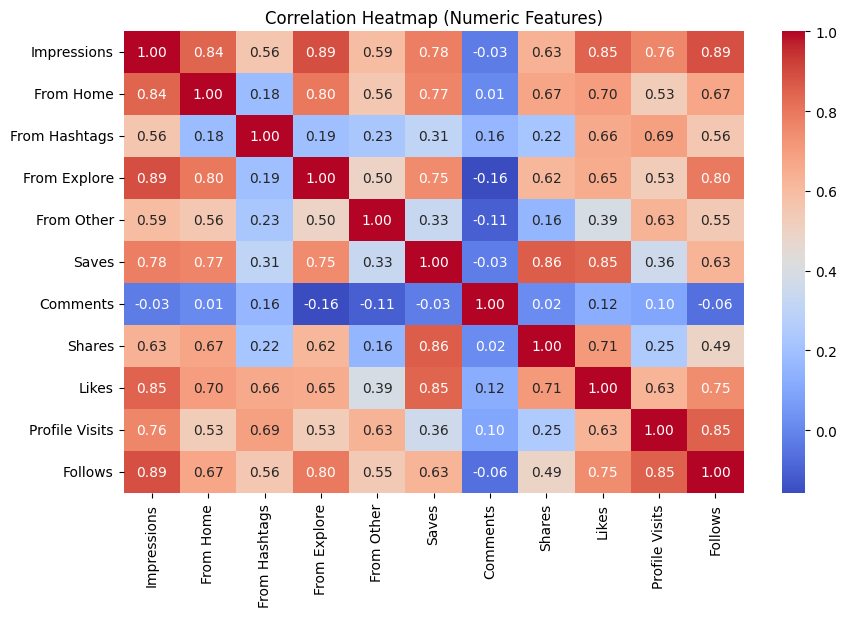

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


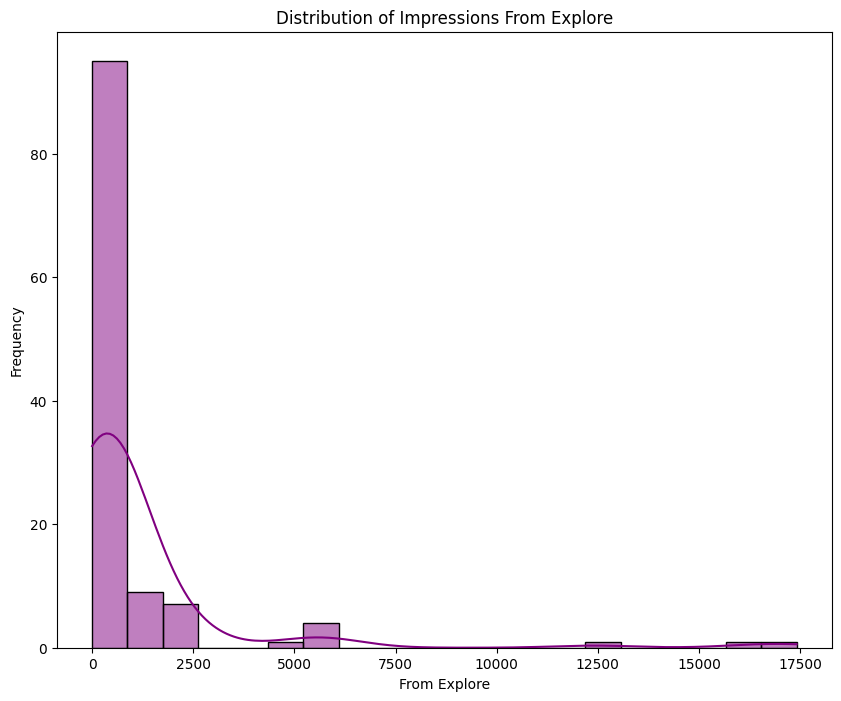

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df["From Explore"], bins=20, kde=True, color="purple")
plt.xlabel("From Explore")
plt.ylabel("Frequency")
plt.show()

In [ ]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

source_df = pd.DataFrame({
    "Source": ['From Home', 'From Hashtags', 'From Explore', 'Other'],
    "Impressions": [home, hashtags, explore, other]
})

fig = px.pie(source_df, values="Impressions", names="Source",
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()


**Analyzing Content**

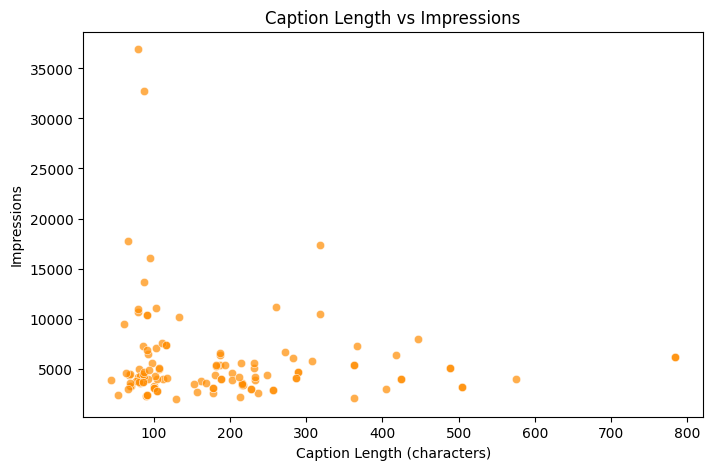

In [ ]:
df["caption_len"] = df["Caption"].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="caption_len", y="Impressions", color="darkorange", alpha=0.7)
plt.title("Caption Length vs Impressions")
plt.xlabel("Caption Length (characters)")
plt.ylabel("Impressions")
plt.show()

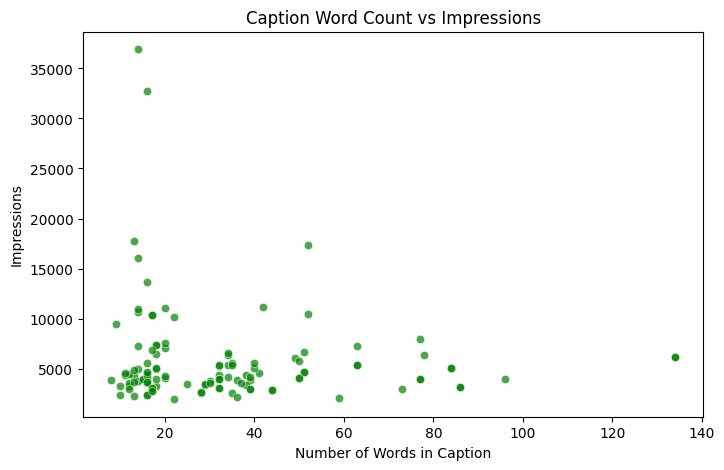

In [ ]:
df["caption_wordcount"] = df["Caption"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="caption_wordcount", y="Impressions", color="green", alpha=0.7)
plt.title("Caption Word Count vs Impressions")
plt.xlabel("Number of Words in Caption")
plt.ylabel("Impressions")
plt.show()

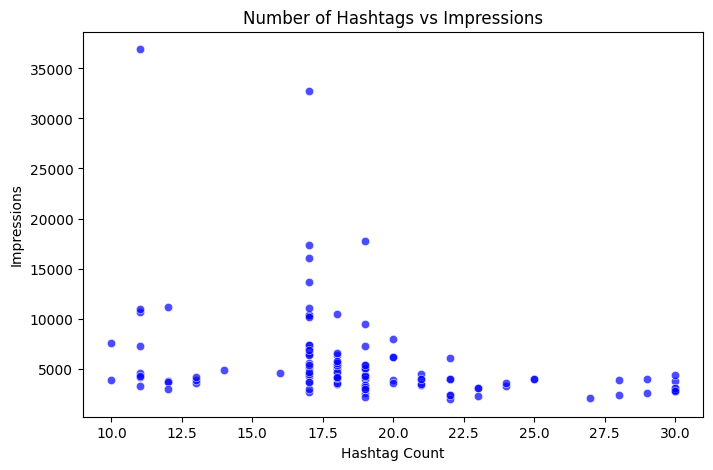

In [ ]:
df["hashtag_count"] = df["Hashtags"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="hashtag_count", y="Impressions", color="blue", alpha=0.7)
plt.title("Number of Hashtags vs Impressions")
plt.xlabel("Hashtag Count")
plt.ylabel("Impressions")
plt.show()


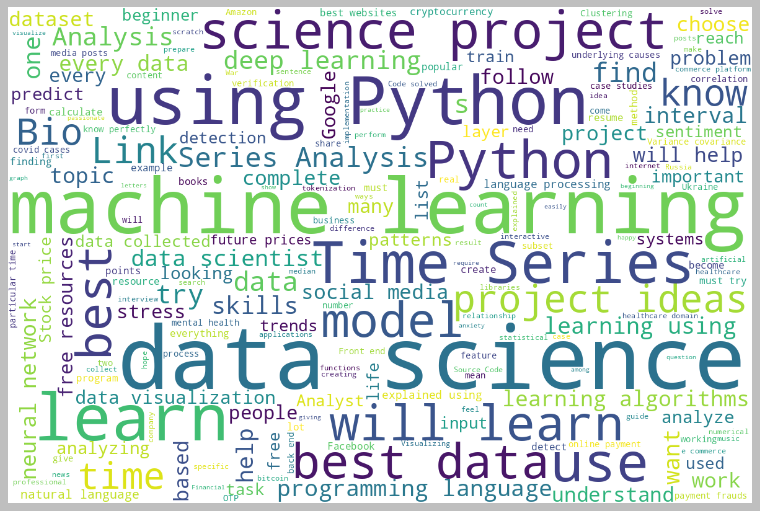

In [ ]:
text = " ".join(str(i) for i in df["Caption"])

stopwords = set(STOPWORDS)

stopwords.update(["post", "instagram", "today"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      width=1200, height=800).generate(text)

plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


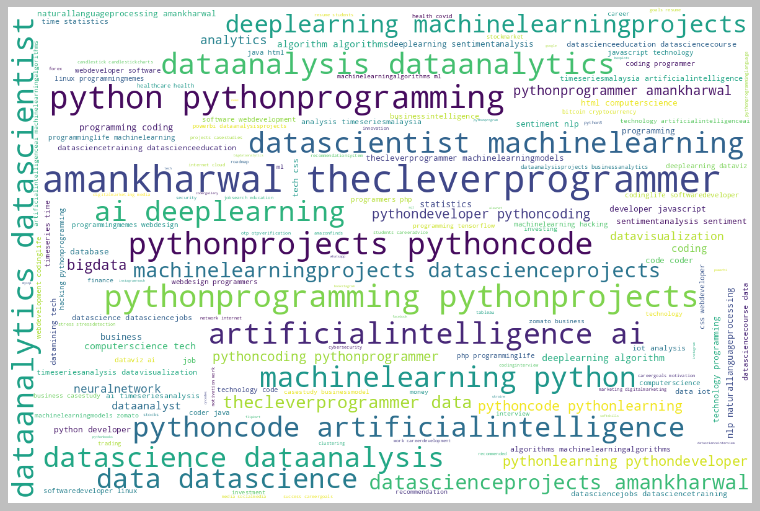

In [ ]:
text = " ".join(str(i) for i in df["Hashtags"])
text = text.replace("#", "")
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      width=1200, height=800).generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Analyzing Relationships**

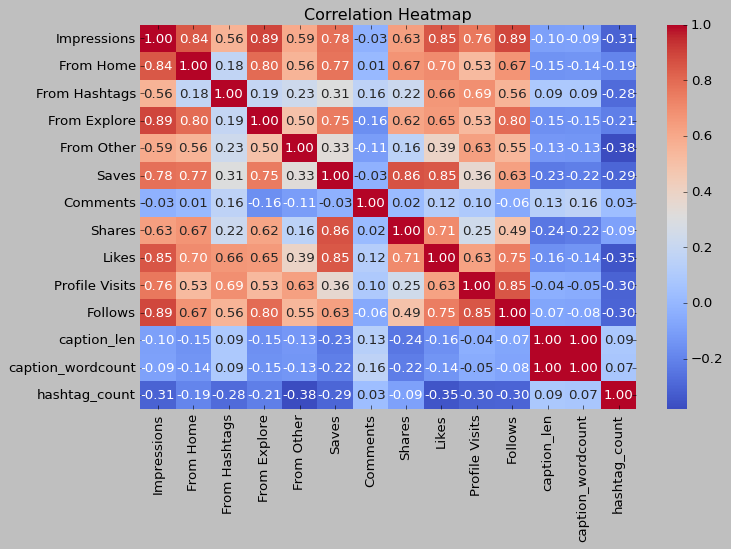

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

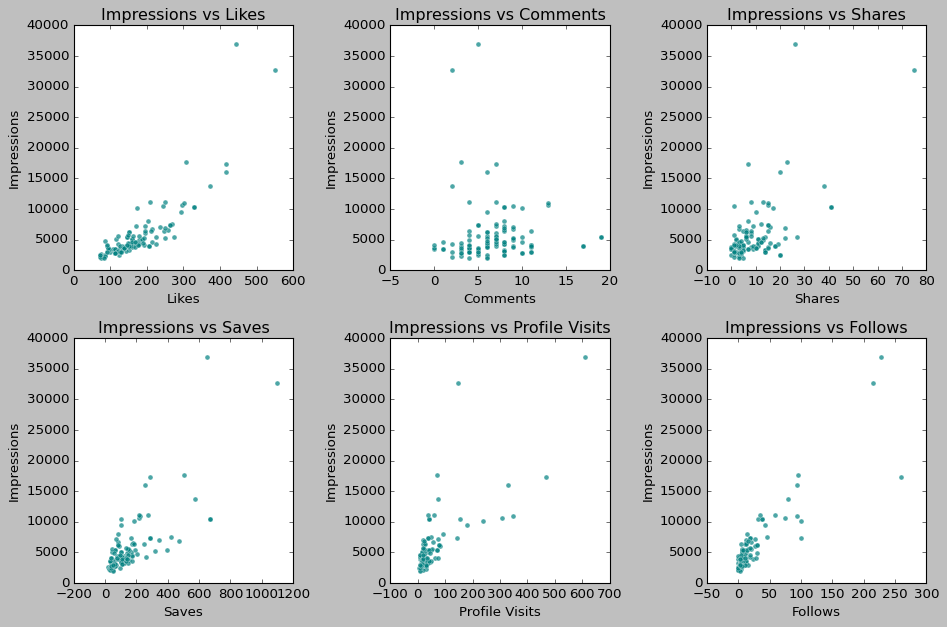

In [ ]:
engagement_features = ["Likes", "Comments", "Shares", "Saves", "Profile Visits", "Follows"]

plt.figure(figsize=(12,8))
for i, col in enumerate(engagement_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y="Impressions", alpha=0.7, color="teal")
    plt.title(f"Impressions vs {col}")
plt.tight_layout()
plt.show()

**Analyzing Conversion Rate**

/tmp/ipython-input-303544859.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





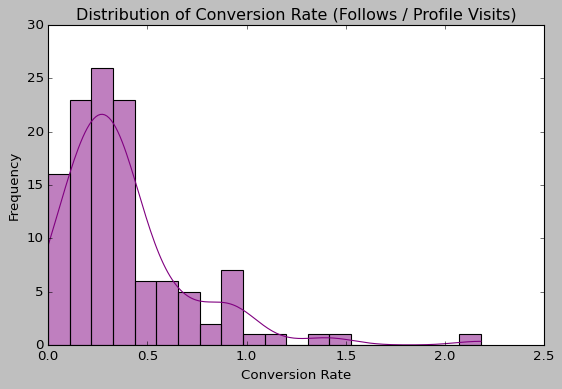

In [ ]:
df["conversion_rate"] = df["Follows"] / df["Profile Visits"]
df["conversion_rate"].fillna(0, inplace=True)
plt.figure(figsize=(8,5))
sns.histplot(df["conversion_rate"], bins=20, kde=True, color="purple")
plt.title("Distribution of Conversion Rate (Follows / Profile Visits)")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

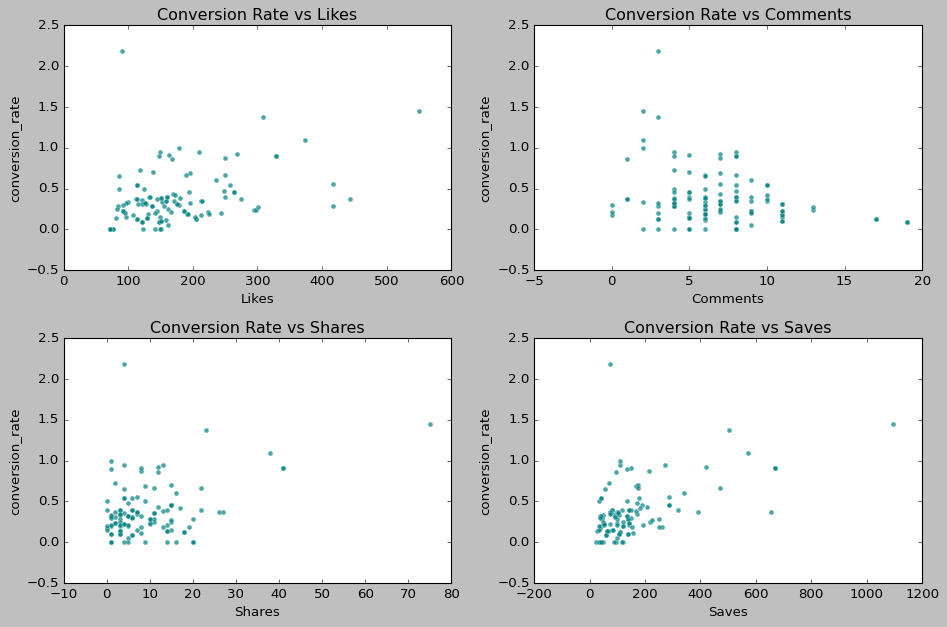

In [ ]:
engagement_features = ["Likes", "Comments", "Shares", "Saves"]

plt.figure(figsize=(12,8))
for i, col in enumerate(engagement_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y="conversion_rate", alpha=0.7, color="teal")
    plt.title(f"Conversion Rate vs {col}")
plt.tight_layout()
plt.show()

**Comparing Multiple Models**

                          RMSE        R2
Linear Regression  2176.698541  0.878005
Ridge Regression   2176.372922  0.878041
Lasso Regression   2176.664340  0.878009
Random Forest      2367.540903  0.855675
Gradient Boosting  2216.821593  0.873466


/tmp/ipython-input-2140172505.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




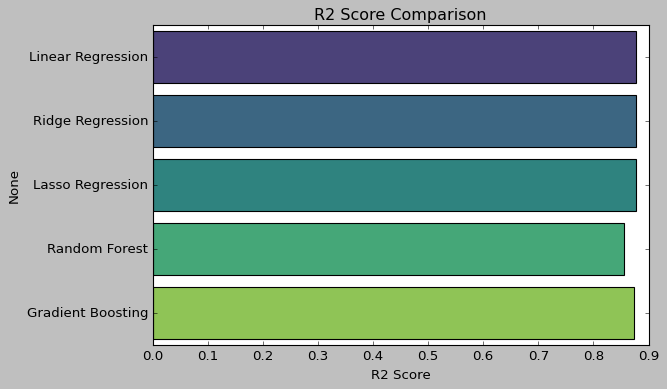

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df[["Likes","Comments","Shares","Saves","Profile Visits","Follows","caption_len","hashtag_count"]]
y = df["Impressions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x=results_df["R2"], y=results_df.index, palette="viridis")
plt.title("R2 Score Comparison")
plt.xlabel("R2 Score")
plt.show()


**Train and Save Ridge Regression Model**

In [ ]:
X = df[["Likes","Comments","Shares","Saves","Profile Visits","Follows","caption_len","hashtag_count"]]
y = df["Impressions"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [ ]:
joblib.dump(ridge_model, "ridge_instagram_model.pkl")
print("Model saved as 'ridge_instagram_model.pkl'")

Model saved as 'ridge_instagram_model.pkl'


**Quick Test Prediction**

In [ ]:
model = joblib.load("ridge_instagram_model.pkl")

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred}).head()

,Actual,Predicted
0,4978,4701.447821
1,7407,7860.836759
2,2518,3967.393393
3,4298,5925.843273
4,5394,3136.895588


**Conclusions**

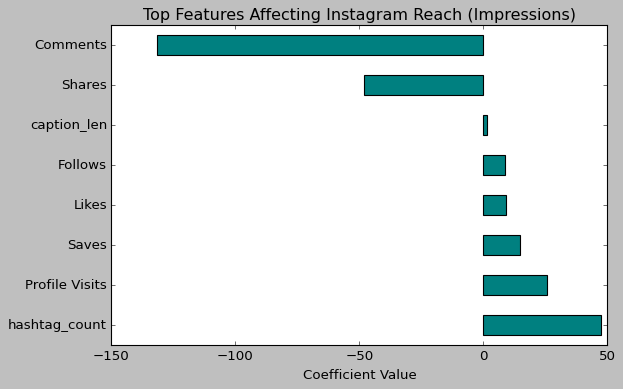

,0
hashtag_count,47.421733
Profile Visits,25.568360
Saves,14.808601
Likes,9.217301
Follows,8.785418
caption_len,1.450657
Shares,-48.362299
Comments,-131.555246


In [ ]:
coef = pd.Series(ridge_model.coef_, index=X.columns).sort_values(ascending=False)

top_features = coef.head(10)

plt.figure(figsize=(8,5))
top_features.plot(kind="barh", color="teal")
plt.title("Top Features Affecting Instagram Reach (Impressions)")
plt.xlabel("Coefficient Value")
plt.show()

top_features

Conclusions

- Hashtag usage is the strongest positive driver of Instagram reach.

- Profile visits are critical for reach, showing direct user interest.

- Saves indicate engaged content and contribute positively to reach.

- Likes and follows also increase reach but have smaller effects.

- Caption length slightly improves reach; more informative captions help.

- Shares and comments had negative coefficients, suggesting that some posts with very high interactions may target niche audiences rather than broad visibility.

- Overall, a combination of engagement metrics and content strategy influences reach; focusing on relevant hashtags, encouraging profile visits, and creating engaging content is key.